# Random Forest Feature Importance

### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

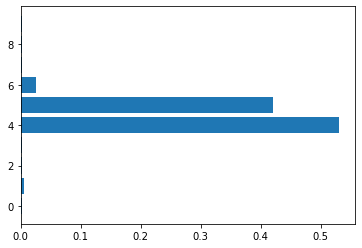

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
plt.barh([x for x in range(len(importance))], importance)
plt.show()

### Iowa Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [2]:
filepath = '../../data_20210213_1406_____USE_THIS_latest_version/train_20210213_1406_NAmean.csv'
housing_df = pd.read_csv(filepath)
housing_df.set_index('Id')
pd.set_option('display.max_columns', None)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Unnamed: 0 to MiscFeature_nan
dtypes: float64(4), int64(192)
memory usage: 2.2 MB


In [3]:
input_features = housing_df.columns.difference(['SalePrice'])

In [4]:
X = housing_df[input_features].to_numpy()
X.shape

(1460, 195)

In [5]:
y = housing_df['SalePrice'].to_numpy()
y.shape

(1460,)

In [6]:
model = RandomForestRegressor(max_features=None, bootstrap=True, oob_score=True)
model.fit(X, y)

RandomForestRegressor(max_features=None, oob_score=True)

In [7]:
print(f"Out-of-bag estimated score on training set: {model.oob_score_ * 100}")

Out-of-bag estimated score on training set: 85.56802352838298


In [8]:
feature_importances = dict(zip(input_features, model.feature_importances_))
len(feature_importances)

195

In [9]:
feature, importance = zip(*sorted(feature_importances.items()))

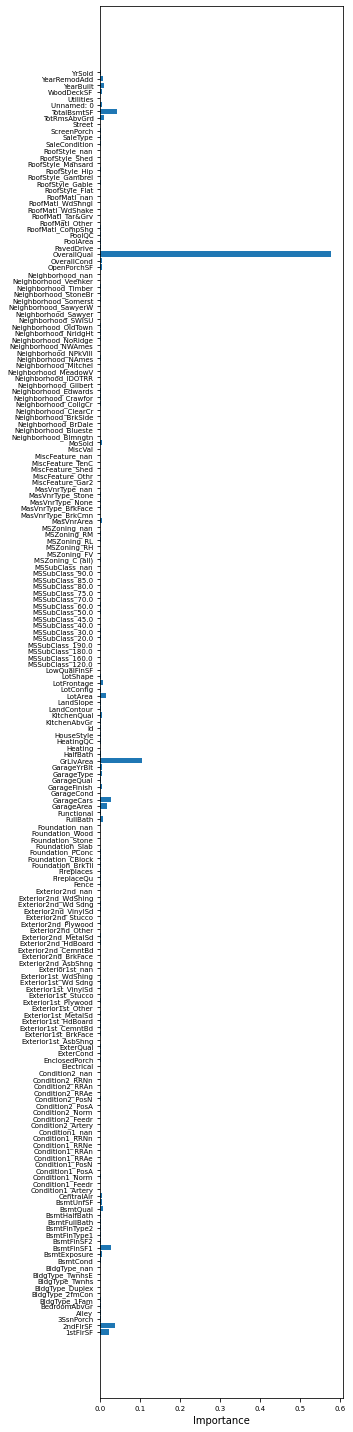

In [10]:
plt.figure(1, [5, 20])
plt.tick_params(axis='both', which='major', labelsize=7)
plt.barh(feature, importance)
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('images/rf_feat_imp.png')
plt.show()

In [33]:
# drop features with importance = 0
nonzero_feature_importances = dict(filter(lambda x: x[1] != 0., feature_importances.items()))
# show importance as per cent
nonzero_feature_importances = dict( map(lambda x: (x[0], x[1]*100), nonzero_feature_importances.items() ))
len(nonzero_feature_importances)

180

In [141]:
feature_importances = dict(zip(input_features, model.feature_importances_))
len(feature_importances)

195

In [11]:
filtered_importances = dict(filter(lambda x: x[1] > 0.003, feature_importances.items()))
filtered_importances

{'1stFlrSF': 0.020547055168051793,
 '2ndFlrSF': 0.03543445219267748,
 'BsmtFinSF1': 0.02530612038705612,
 'BsmtQual': 0.005870706656243179,
 'BsmtUnfSF': 0.004966245462238277,
 'CentralAir': 0.003549509344764943,
 'FullBath': 0.005572546882889805,
 'GarageArea': 0.015469532872866327,
 'GarageCars': 0.02744455665451846,
 'GarageFinish': 0.003660047934594354,
 'GarageType': 0.0047901287710849245,
 'GarageYrBlt': 0.004397649439725211,
 'GrLivArea': 0.10403986589705923,
 'KitchenQual': 0.004266949705247018,
 'LotArea': 0.013313316309287377,
 'LotFrontage': 0.006625124034259003,
 'MasVnrArea': 0.00471806544313474,
 'MoSold': 0.003094068700273371,
 'OpenPorchSF': 0.004175144011252821,
 'OverallCond': 0.003958644050198933,
 'OverallQual': 0.5773326114838356,
 'TotRmsAbvGrd': 0.008958264788644421,
 'TotalBsmtSF': 0.041378764594040135,
 'WoodDeckSF': 0.004504051032485211,
 'YearBuilt': 0.008031871441004345,
 'YearRemodAdd': 0.0064181324886280556}

In [57]:
# sort by value in descending order
sorted_importances = dict(sorted(filtered_importances.items(), key=lambda kv: kv[1], reverse=True))
sorted_importances

{'OverallQual': 0.5773326114838356,
 'GrLivArea': 0.10403986589705923,
 'TotalBsmtSF': 0.041378764594040135,
 '2ndFlrSF': 0.03543445219267748,
 'GarageCars': 0.02744455665451846,
 'BsmtFinSF1': 0.02530612038705612,
 '1stFlrSF': 0.020547055168051793,
 'GarageArea': 0.015469532872866327,
 'LotArea': 0.013313316309287377,
 'TotRmsAbvGrd': 0.008958264788644421,
 'YearBuilt': 0.008031871441004345,
 'LotFrontage': 0.006625124034259003,
 'YearRemodAdd': 0.0064181324886280556,
 'BsmtQual': 0.005870706656243179,
 'FullBath': 0.005572546882889805,
 'BsmtUnfSF': 0.004966245462238277,
 'GarageType': 0.0047901287710849245,
 'MasVnrArea': 0.00471806544313474,
 'WoodDeckSF': 0.004504051032485211,
 'GarageYrBlt': 0.004397649439725211,
 'KitchenQual': 0.004266949705247018,
 'OpenPorchSF': 0.004175144011252821,
 'OverallCond': 0.003958644050198933,
 'GarageFinish': 0.003660047934594354,
 'CentralAir': 0.003549509344764943,
 'MoSold': 0.003094068700273371}

In [60]:
import more_itertools
# take 10 highest values from the top
first_10 = more_itertools.take(10, sorted_importances.items())
top_10_importances = dict(first_10)
print(top_10_importances)

{'OverallQual': 0.5773326114838356, 'GrLivArea': 0.10403986589705923, 'TotalBsmtSF': 0.041378764594040135, '2ndFlrSF': 0.03543445219267748, 'GarageCars': 0.02744455665451846, 'BsmtFinSF1': 0.02530612038705612, '1stFlrSF': 0.020547055168051793, 'GarageArea': 0.015469532872866327, 'LotArea': 0.013313316309287377, 'TotRmsAbvGrd': 0.008958264788644421}


In [63]:
feature, importance = zip(*sorted(top_10_importances.items()))
sorted_idx = np.array(importance).argsort()

feats = []
idxs = []
for idx in sorted_idx:
    feats.append(feature[idx])
    idxs.append(importance[idx])
feats.reverse()
idxs.reverse()

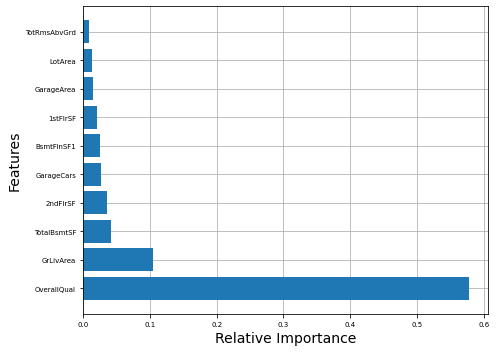

In [77]:
# plt.figure(1, [5, 20])
plt.figure(figsize=(7,5))
plt.tick_params(axis='both', which='major', labelsize=7)
plt.barh(feats, idxs)
plt.grid(True)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
# plt.title('Random Forest Importances')
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('images/rf_feat_imp.png')
plt.show()

### Permutation Importance

In [78]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)

In [79]:
feature_importances = dict(zip(input_features, result.importances_mean))
len(feature_importances)

195

In [80]:
filtered_importances = dict(filter(lambda x: x[1] > 0.003, feature_importances.items()))
filtered_importances

{'1stFlrSF': 0.016071899397181445,
 '2ndFlrSF': 0.020622803351552234,
 'BsmtFinSF1': 0.025831184990246846,
 'BsmtQual': 0.003799716977667622,
 'BsmtUnfSF': 0.003073244300007305,
 'GarageArea': 0.010115350857625749,
 'GarageCars': 0.016492698014317596,
 'GarageType': 0.005347113392849512,
 'GrLivArea': 0.1537767425470626,
 'LotArea': 0.011014584795538485,
 'LotFrontage': 0.005016877606396064,
 'OpenPorchSF': 0.0037221137471548094,
 'OverallCond': 0.004879029926966283,
 'OverallQual': 0.47428364571489645,
 'TotRmsAbvGrd': 0.005880084667824315,
 'TotalBsmtSF': 0.03901985419416273,
 'YearBuilt': 0.006596562562556474,
 'YearRemodAdd': 0.007288235130029552}

In [81]:
# sort by value in descending order
sorted_importances = dict(sorted(filtered_importances.items(), key=lambda kv: kv[1], reverse=True))
sorted_importances

{'OverallQual': 0.47428364571489645,
 'GrLivArea': 0.1537767425470626,
 'TotalBsmtSF': 0.03901985419416273,
 'BsmtFinSF1': 0.025831184990246846,
 '2ndFlrSF': 0.020622803351552234,
 'GarageCars': 0.016492698014317596,
 '1stFlrSF': 0.016071899397181445,
 'LotArea': 0.011014584795538485,
 'GarageArea': 0.010115350857625749,
 'YearRemodAdd': 0.007288235130029552,
 'YearBuilt': 0.006596562562556474,
 'TotRmsAbvGrd': 0.005880084667824315,
 'GarageType': 0.005347113392849512,
 'LotFrontage': 0.005016877606396064,
 'OverallCond': 0.004879029926966283,
 'BsmtQual': 0.003799716977667622,
 'OpenPorchSF': 0.0037221137471548094,
 'BsmtUnfSF': 0.003073244300007305}

In [82]:
# take 10 highest values from the top
first_10 = more_itertools.take(10, sorted_importances.items())
top_10_importances = dict(first_10)
top_10_importances

{'OverallQual': 0.47428364571489645,
 'GrLivArea': 0.1537767425470626,
 'TotalBsmtSF': 0.03901985419416273,
 'BsmtFinSF1': 0.025831184990246846,
 '2ndFlrSF': 0.020622803351552234,
 'GarageCars': 0.016492698014317596,
 '1stFlrSF': 0.016071899397181445,
 'LotArea': 0.011014584795538485,
 'GarageArea': 0.010115350857625749,
 'YearRemodAdd': 0.007288235130029552}

In [83]:
feature, importance = zip(*sorted(top_10_importances.items()))
sorted_idx = np.array(importance).argsort()

feats = []
idxs = []
for idx in sorted_idx:
    feats.append(feature[idx])
    idxs.append(importance[idx])
feats.reverse()
idxs.reverse()

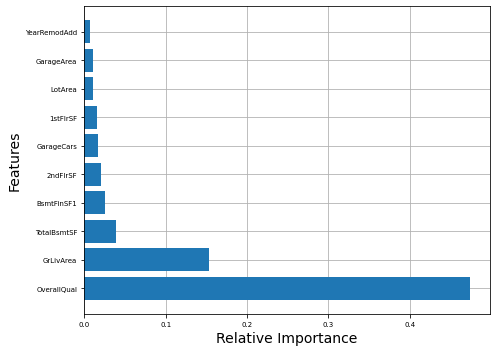

In [84]:
sorted_idx = result.importances_mean.argsort()
# plt.figure(1, [5, 20])
plt.figure(figsize=(7,5))
plt.tick_params(axis='both', which='major', labelsize=7)
plt.barh(feats, idxs)
# plt.barh(housing_df[input_features].columns[sorted_idx], result.importances_mean[sorted_idx])
plt.grid(True)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.rc('axes', axisbelow=True)
# plt.title("Permutation Importances")
plt.tight_layout()
plt.savefig('images/permutation_importance.png')
plt.show()

### SHAP

In [6]:
import shap

In [9]:
# train model
model = RandomForestRegressor(max_features=None, bootstrap=True, oob_score=True)
model.fit(X, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

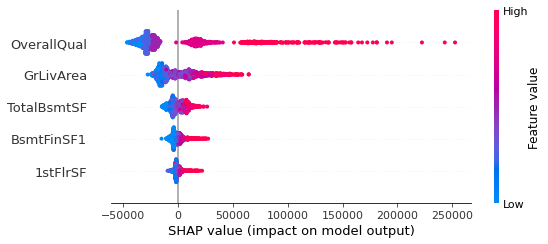

In [14]:
shap.summary_plot(shap_values, X, input_features, max_display=5, show=False)
plt.tight_layout()
plt.savefig('images/shap_summary_top5_feature.png')

In [7]:
# CAUTION: Ignore!
# train model
model = RandomForestRegressor(max_features=None, bootstrap=True, oob_score=True)
model.fit(X, y)

# explain model prediction
explainer = shap.Explainer(model)

shap_values = explainer(X)

In [12]:
# CAUTION: Ignore!
shap.summary_plot(shap_values)
plt.tight_layout()
plt.savefig('images/shap_summary_new.png')

AttributeError: 'Explanation' object has no attribute 'base_value'

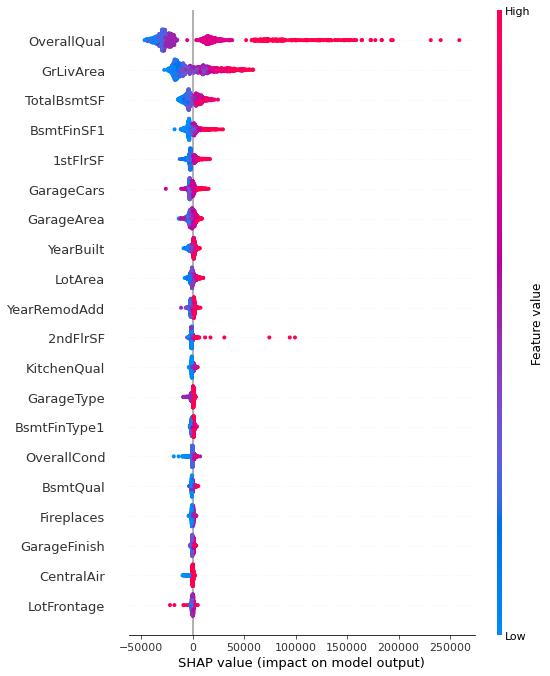

In [167]:
shap.summary_plot(shap_values, X, input_features, show=False)
plt.tight_layout()
plt.savefig('images/shap_summary.png')

### Mutual Information

In [6]:
from sklearn.feature_selection import mutual_info_regression

In [7]:
mi = mutual_info_regression(X, y)

In [12]:
mi_dict = dict(zip(input_features, mi))
len(mi_dict)

195

In [14]:
# filter features with MI = 0
mi_dict_filtered = dict(filter(lambda x: x[1] > 0.0, mi_dict.items()))
mi_dict_filtered

{'1stFlrSF': 0.30988975926604345,
 '2ndFlrSF': 0.19830142624157032,
 'Alley': 0.008592388354651037,
 'BedroomAbvGr': 0.06067407316514073,
 'BldgType_1Fam': 0.011115176747452216,
 'BldgType_2fmCon': 0.0017412916590959782,
 'BldgType_Duplex': 0.017674065604130096,
 'BldgType_Twnhs': 0.003057291553034913,
 'BldgType_nan': 0.0027483341534031425,
 'BsmtCond': 0.04247785599848619,
 'BsmtExposure': 0.06313755020145573,
 'BsmtFinSF1': 0.15114483093554654,
 'BsmtFinSF2': 0.003664427037191942,
 'BsmtFinType1': 0.13207785494539248,
 'BsmtFinType2': 0.01879216829260444,
 'BsmtFullBath': 0.01691220151690276,
 'BsmtHalfBath': 0.024411154877280516,
 'BsmtQual': 0.317794902314114,
 'BsmtUnfSF': 0.11860853846557351,
 'CentralAir': 0.0788627812637741,
 'Condition1_Artery': 0.01683238861445946,
 'Condition1_Feedr': 0.005973097530362459,
 'Condition1_PosA': 0.018147939960448722,
 'Condition1_PosN': 0.007579858466009171,
 'Condition1_nan': 0.007101075716626548,
 'Condition2_Norm': 0.007539830149503102,
 'C

In [16]:
feature, m = zip(*sorted(mi_dict_filtered.items()))
sorted_idx = np.array(m).argsort()

feats = []
ms = []
for idx in sorted_idx:
    feats.append(feature[idx])
    ms.append(m[idx])

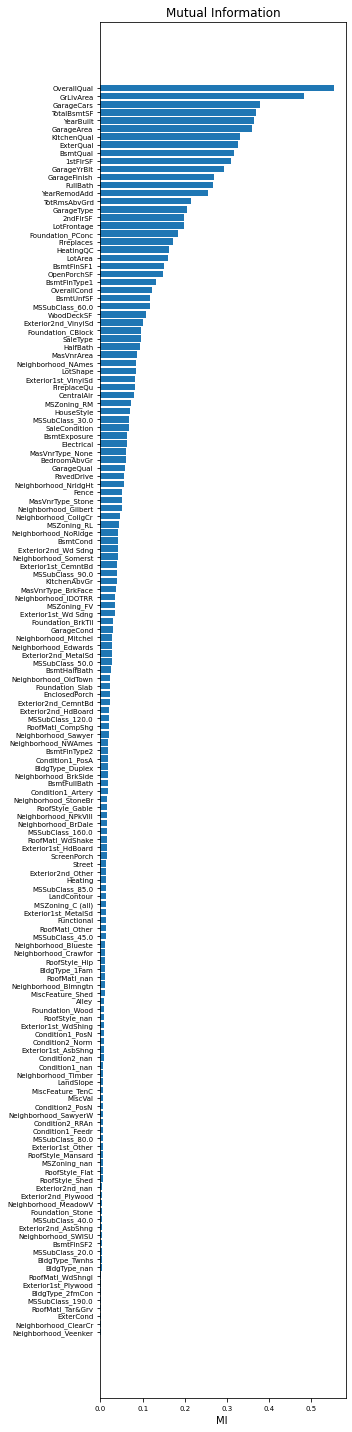

In [18]:
plt.figure(1, [5, 20])
plt.tick_params(axis='both', which='major', labelsize=7)
plt.barh(feats, ms)
# plt.barh(housing_df[input_features].columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('MI ')
plt.title("Mutual Information")
plt.tight_layout()
plt.savefig('images/mi.png')
plt.show()

### Recursive Feature Elimination

In [23]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [20]:
rf_regressor = RandomForestRegressor(max_features=None, bootstrap=True, oob_score=True)
rfe = RFE(estimator=rf_regressor, n_features_to_select=0.5, step=1)
rfe.fit(X,y)
print('No. of selected features: ', rfe.n_features_)

TypeError: slice indices must be integers or None or have an __index__ method

In [26]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=0.5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)

TypeError: slice indices must be integers or None or have an __index__ method